In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [77]:
df = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv', index_col='Person ID')

In [78]:
k_col =  ['성별',
          '나이',
          '직업',
          '수면 시간',
          '수면의 질(등급:1-10)',
          '신체 활동수준(분/일)',
          '스트레스 수준',
          'BMI 범주',
          '심박수(BPM)',
          '일일 걸음 수',
          '수면 장애',
          '혈압(수축기)',
          '혈압(이완기)']

In [79]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('healthy')

In [80]:
df.shape

(374, 12)

In [81]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,healthy
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,healthy
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,healthy
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [82]:
# 데이터 글씨 한글로 바꾸기

In [83]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [84]:
df['BMI Category'] = df['BMI Category'].str.replace('Overweight','과체중')

In [85]:
df['BMI Category'] = df['BMI Category'].str.replace('Normal Weight','저체중')

In [86]:
df['BMI Category'] = df['BMI Category'].str.replace('Normal','정상')

In [87]:
df['BMI Category'] = df['BMI Category'].str.replace('Obese','비만')

In [88]:
sorted(df['BMI Category'].unique())

['과체중', '비만', '저체중', '정상']

In [89]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [90]:
df['Gender'] = df['Gender'].str.replace('Female','여자')

In [91]:
df['Gender'] = df['Gender'].str.replace('Male','남자')

In [92]:
sorted(df['Gender'].unique())

['남자', '여자']

In [93]:
df['Sleep Disorder'] = df['Sleep Disorder'].str.replace('Sleep Apnea','무호흡증')

In [94]:
df['Sleep Disorder'] = df['Sleep Disorder'].str.replace('healthy','정상')

In [95]:
df['Sleep Disorder'] = df['Sleep Disorder'].str.replace('Insomnia','불면증')

In [96]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,남자,27,Software Engineer,6.1,6,42,6,과체중,126/83,77,4200,정상
2,남자,28,Doctor,6.2,6,60,8,정상,125/80,75,10000,정상
3,남자,28,Doctor,6.2,6,60,8,정상,125/80,75,10000,정상
4,남자,28,Sales Representative,5.9,4,30,8,비만,140/90,85,3000,무호흡증
5,남자,28,Sales Representative,5.9,4,30,8,비만,140/90,85,3000,무호흡증


In [97]:
df['up Blood']= df['Blood Pressure'].str.split('/').str[0]

In [98]:
df['down Blood']= df['Blood Pressure'].str.split('/').str[1]

In [99]:
df.drop('Blood Pressure', axis=1, inplace=True)

In [100]:
df.columns = k_col

In [101]:
df.head()

,성별,나이,직업,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,BMI 범주,심박수(BPM),일일 걸음 수,수면 장애,혈압(수축기),혈압(이완기)
Person ID,,,,,,,,,,,,,
1,남자,27,Software Engineer,6.1,6,42,6,과체중,77,4200,정상,126,83
2,남자,28,Doctor,6.2,6,60,8,정상,75,10000,정상,125,80
3,남자,28,Doctor,6.2,6,60,8,정상,75,10000,정상,125,80
4,남자,28,Sales Representative,5.9,4,30,8,비만,85,3000,무호흡증,140,90
5,남자,28,Sales Representative,5.9,4,30,8,비만,85,3000,무호흡증,140,90


In [102]:
df.to_csv('.\k_df.csv')

In [103]:
df2 = df['수면 장애'].value_counts()

In [104]:
df2

수면 장애
정상      219
무호흡증     78
불면증      77
Name: count, dtype: int64

In [105]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

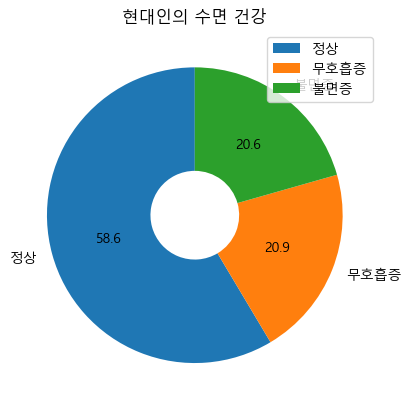

In [106]:
plt.pie(df2, labels= df2.index, autopct= '%.1f', startangle=90, wedgeprops={'width':0.7}) 
plt.title('현대인의 수면 건강')
plt.legend() 
plt.show()

In [107]:
sorted(df['수면 장애'].unique())

['무호흡증', '불면증', '정상']

In [108]:
df.describe()

,나이,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,심박수(BPM),일일 걸음 수
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [109]:
df.corr( numeric_only=True )

,나이,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,심박수(BPM),일일 걸음 수
나이,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
수면 시간,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
수면의 질(등급:1-10),0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
신체 활동수준(분/일),0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
스트레스 수준,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
심박수(BPM),-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
일일 걸음 수,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [110]:
# 수면 건강과 스트레스 레벨의 관계

In [111]:
sorted(df['수면 장애'].unique())

['무호흡증', '불면증', '정상']

In [112]:
df['직업'].nunique()

11

In [113]:
df['성별'].nunique()

2

In [114]:
df['BMI 범주'].nunique()

4

In [115]:
df['수면 장애'].nunique()

3

In [116]:
df['혈압(수축기)'] = pd.to_numeric(df['혈압(수축기)'])

In [117]:
df['혈압(이완기)'] = pd.to_numeric(df['혈압(이완기)'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   성별              374 non-null    object 
 1   나이              374 non-null    int64  
 2   직업              374 non-null    object 
 3   수면 시간           374 non-null    float64
 4   수면의 질(등급:1-10)  374 non-null    int64  
 5   신체 활동수준(분/일)    374 non-null    int64  
 6   스트레스 수준         374 non-null    int64  
 7   BMI 범주          374 non-null    object 
 8   심박수(BPM)        374 non-null    int64  
 9   일일 걸음 수         374 non-null    int64  
 10  수면 장애           374 non-null    object 
 11  혈압(수축기)         374 non-null    int64  
 12  혈압(이완기)         374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.9+ KB


In [119]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [120]:
encoder = LabelEncoder()

In [121]:
df['성별'] = encoder.fit_transform(df['성별'])

In [122]:
df['수면 장애'] = encoder.fit_transform(df['수면 장애'])

In [123]:
df.head()

,성별,나이,직업,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,BMI 범주,심박수(BPM),일일 걸음 수,수면 장애,혈압(수축기),혈압(이완기)
Person ID,,,,,,,,,,,,,
1,0,27,Software Engineer,6.1,6,42,6,과체중,77,4200,2,126,83
2,0,28,Doctor,6.2,6,60,8,정상,75,10000,2,125,80
3,0,28,Doctor,6.2,6,60,8,정상,75,10000,2,125,80
4,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90
5,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90


In [128]:
X_list = list(df['수면 장애'].unique())

In [131]:
y_list = df['나이'].to_list()

In [140]:
df.loc[df['수면 장애'] == 0, ]

,성별,나이,직업,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,BMI 범주,심박수(BPM),일일 걸음 수,수면 장애,혈압(수축기),혈압(이완기)
Person ID,,,,,,,,,,,,,
4,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90
5,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90
17,1,29,Nurse,6.5,5,40,7,저체중,80,4000,0,132,87
18,0,29,Doctor,6.0,6,30,8,정상,70,8000,0,120,80
31,1,30,Nurse,6.4,5,35,7,저체중,78,4100,0,130,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1,59,Nurse,8.1,9,75,3,과체중,68,7000,0,140,95
371,1,59,Nurse,8.0,9,75,3,과체중,68,7000,0,140,95
372,1,59,Nurse,8.1,9,75,3,과체중,68,7000,0,140,95


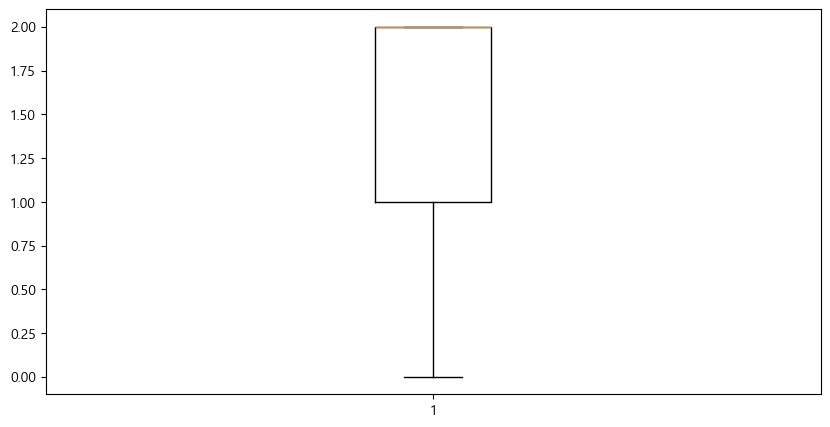

In [145]:
plt.figure(figsize = (10, 5))
plt.boxplot(df['수면 장애'])
plt.show()

In [147]:
df_0 = df.loc[df['수면 장애'] == 0, ]

In [148]:
df_1 = df.loc[df['수면 장애'] == 1, ]

In [149]:
df_2 = df.loc[df['수면 장애'] == 2, ]

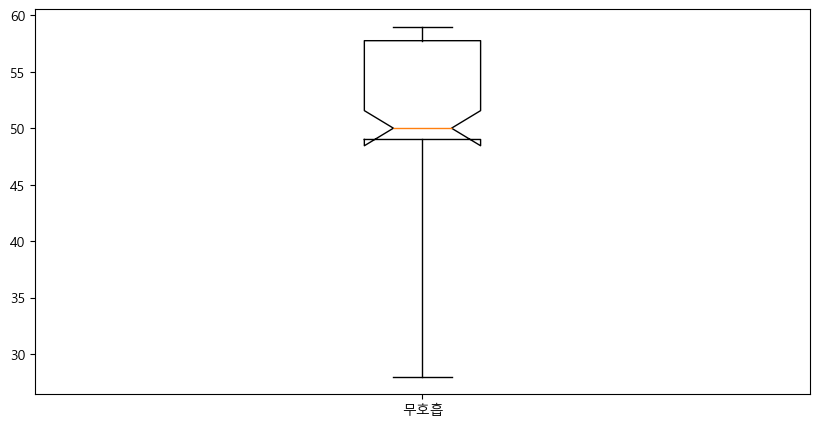

In [158]:
plt.figure(figsize = (10, 5))
plt.boxplot(df_0['나이'], whis=3, notch=True)
plt.xticks(np.arange(1, 2), ['무호흡'])
plt.show()

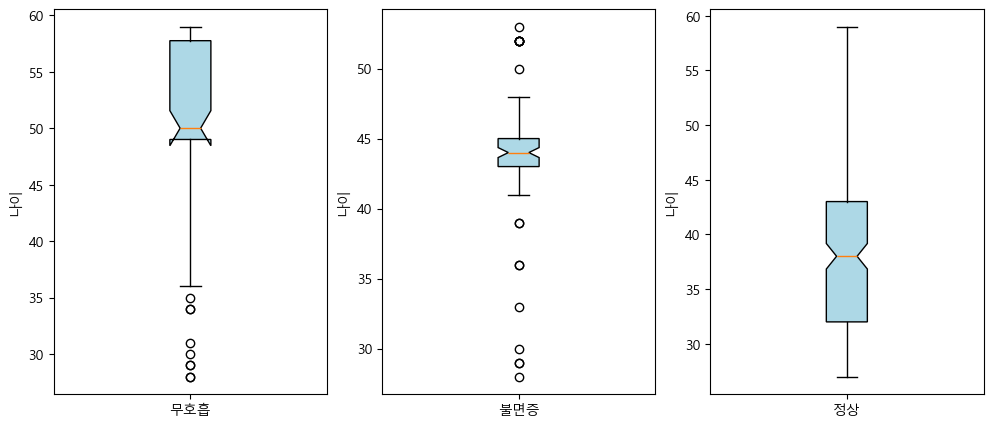

In [189]:
# 차트 사이즈
plt.figure( figsize= (12, 5) ) #figsize= (12, 5) (가로, 세로)

plt.subplot(1, 3, 1) #(행, 열 , 순서 번째)
bplot1 = plt.boxplot(df_0['나이'], notch=True, patch_artist=True)
plt.xticks(np.arange(1, 2), ['무호흡'])
plt.ylabel('나이')

plt.subplot(1, 3, 2)
bplot2 = plt.boxplot(df_1['나이'], notch=True, patch_artist=True)
plt.xticks(np.arange(1, 2), ['불면증'])
plt.ylabel('나이')

plt.subplot(1, 3, 3) #(행, 열 , 순서 번째)
bplot3 = plt.boxplot(df_2['나이'], notch=True, patch_artist=True)
plt.xticks(np.arange(1, 2), ['정상'])
plt.ylabel('나이')

colors = ['lightblue']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

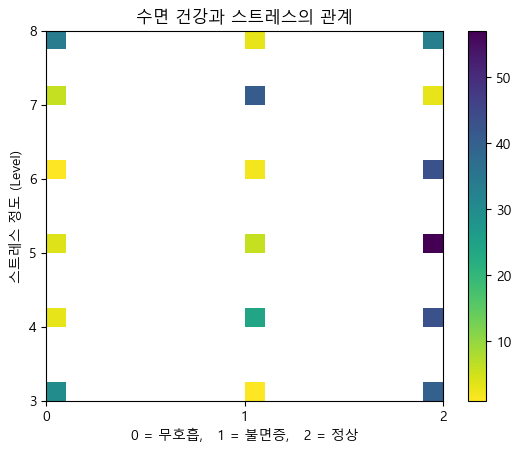

In [64]:
plt.hist2d(data=df, x='수면 장애', y= '스트레스 수준', cmin= 0.5, cmap = 'viridis_r', bins= 20)
#cmin= 0.5 데이터가 없는 곳은 비어둔다
#cmap = 'viridis_r' 원래 색상에서 반대로
#bins= 20 팔라미터 디폴듯 값은 10
plt.xticks([0, 1, 2])
plt.colorbar()
plt.title('수면 건강과 스트레스의 관계')
plt.xlabel('0 = 무호흡,   1 = 불면증,   2 = 정상')
plt.ylabel('스트레스 정도 (Level)')
plt.show()

In [78]:
num_col =  ['나이',
          '수면 시간',
          '수면의 질(등급:1-10)',
          '신체 활동수준(분/일)',
          '스트레스 수준',
          'BMI 범주',
          '심박수(BPM)',
          '일일 걸음 수',
          '혈압(수축기)',
          '혈압(이완기)']

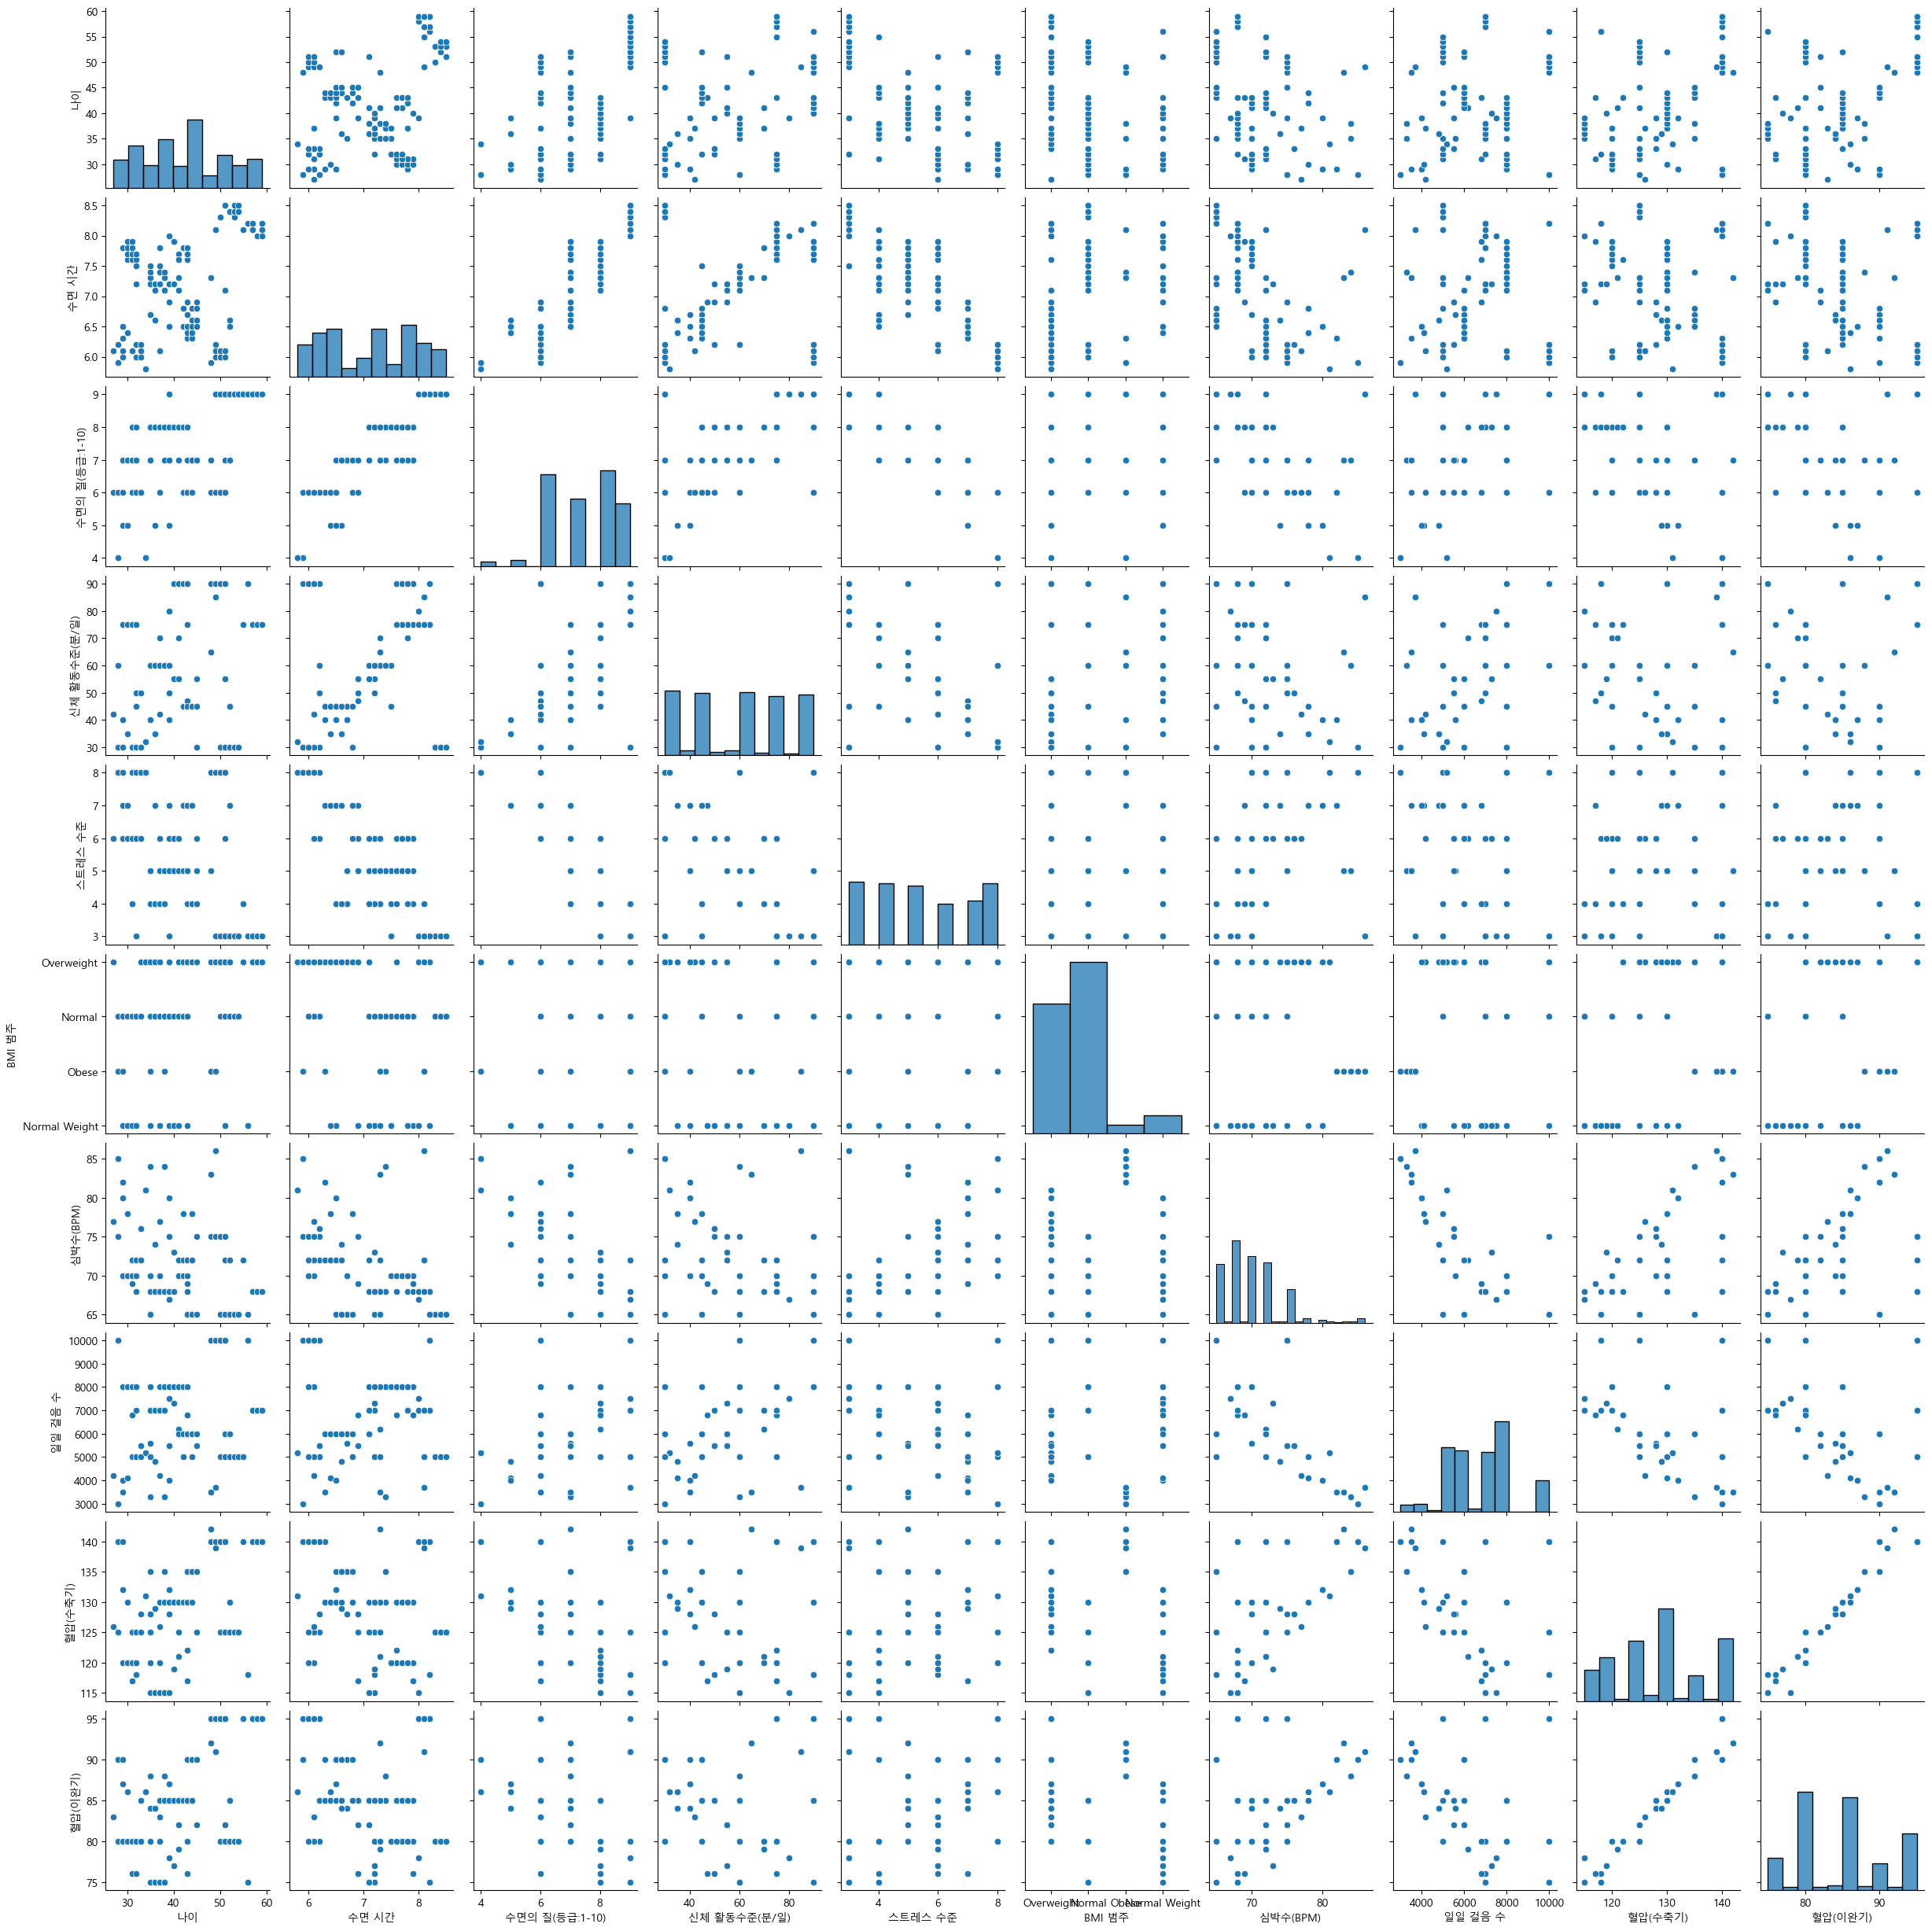

In [79]:
sb.pairplot( data=df, vars=num_col )
plt.show()

In [61]:
df.isna().sum()

성별                0
나이                0
직업                0
수면 시간             0
수면의 질(등급:1-10)    0
신체 활동수준(분/일)      0
스트레스 수준           0
BMI 범주            0
심박수(BPM)          0
일일 걸음 수           0
수면 장애             0
혈압(수축기)           0
혈압(이완기)           0
dtype: int64

In [62]:
# X, y 만들기

In [63]:
y = df['수면 장애']

In [64]:
sorted(y.unique())

[0, 1, 2]

In [65]:
df['BMI 범주'].nunique()

4

In [88]:
df.head()

,성별,나이,직업,수면 시간,수면의 질(등급:1-10),신체 활동수준(분/일),스트레스 수준,BMI 범주,심박수(BPM),일일 걸음 수,수면 장애,혈압(수축기),혈압(이완기)
Person ID,,,,,,,,,,,,,
1,0,27,Software Engineer,6.1,6,42,6,과체중,77,4200,2,126,83
2,0,28,Doctor,6.2,6,60,8,정상,75,10000,2,125,80
3,0,28,Doctor,6.2,6,60,8,정상,75,10000,2,125,80
4,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90
5,0,28,Sales Representative,5.9,4,30,8,비만,85,3000,0,140,90


In [66]:
X_col =  ['성별',
          '나이',
          '수면 시간',
          '수면의 질(등급:1-10)',
          '신체 활동수준(분/일)',
          '스트레스 수준',
          'BMI 범주',
          '심박수(BPM)',
          '일일 걸음 수',
          '혈압(수축기)',
          '혈압(이완기)']

In [67]:
X = df.loc[:,X_col]

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   성별              374 non-null    int32  
 1   나이              374 non-null    int64  
 2   수면 시간           374 non-null    float64
 3   수면의 질(등급:1-10)  374 non-null    int64  
 4   신체 활동수준(분/일)    374 non-null    int64  
 5   스트레스 수준         374 non-null    int64  
 6   BMI 범주          374 non-null    object 
 7   심박수(BPM)        374 non-null    int64  
 8   일일 걸음 수         374 non-null    int64  
 9   혈압(수축기)         374 non-null    int64  
 10  혈압(이완기)         374 non-null    int64  
dtypes: float64(1), int32(1), int64(8), object(1)
memory usage: 33.6+ KB


In [70]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')

In [71]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [6])])

In [72]:
X = ct.fit_transform(X)

In [73]:
X

array([[1.00e+00, 0.00e+00, 0.00e+00, ..., 4.20e+03, 1.26e+02, 8.30e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+04, 1.25e+02, 8.00e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+04, 1.25e+02, 8.00e+01],
       ...,
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 7.00e+03, 1.40e+02, 9.50e+01]])

In [74]:
# training / test 로 나뉜다

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=65 )

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
m_scaler_x = MinMaxScaler()

m_scaler_x.fit_transform(X)

array([[1.        , 0.        , 0.        , ..., 0.17142857, 0.40740741,
        0.4       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.37037037,
        0.25      ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.37037037,
        0.25      ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.57142857, 0.92592593,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.57142857, 0.92592593,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.57142857, 0.92592593,
        1.        ]])

In [79]:
X.shape

(374, 14)

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [81]:
model.fit(X_train, y_train)

C:\Users\405\.conda\envs\st_310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [82]:
y_perd = model.predict(X_test)

In [83]:
y_perd

array([0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2])

In [84]:
y_test

Person ID
279    1
367    0
288    0
203    1
147    1
      ..
120    2
22     2
295    0
170    2
338    2
Name: 수면 장애, Length: 75, dtype: int32

In [85]:
import joblib

In [86]:
joblib.dump( model, 'model_ovr.pkl')

['model_ovr.pkl']

In [87]:
joblib.dump( ct, 'ct.pkl')

['ct.pkl']